# House Price Prediction using Linear Regression

In [98]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [100]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [101]:
df_train=pd.read_csv("train.csv")

In [102]:
df_test=pd.read_csv("test.csv")

In [103]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [104]:
df_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [105]:
df_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1459.0,2190.000000,421.321334,1461.0,1825.50,2190.0,2554.50,2919.0
MSSubClass,1459.0,57.378341,42.746880,20.0,20.00,50.0,70.00,190.0
LotFrontage,1232.0,68.580357,22.376841,21.0,58.00,67.0,80.00,200.0
LotArea,1459.0,9819.161069,4955.517327,1470.0,7391.00,9399.0,11517.50,56600.0
OverallQual,1459.0,6.078821,1.436812,1.0,5.00,6.0,7.00,10.0
OverallCond,1459.0,5.553804,1.113740,1.0,5.00,5.0,6.00,9.0
YearBuilt,1459.0,1971.357779,30.390071,1879.0,1953.00,1973.0,2001.00,2010.0
YearRemodAdd,1459.0,1983.662783,21.130467,1950.0,1963.00,1992.0,2004.00,2010.0
MasVnrArea,1444.0,100.709141,177.625900,0.0,0.00,0.0,164.00,1290.0
BsmtFinSF1,1458.0,439.203704,455.268042,0.0,0.00,350.5,753.50,4010.0


In [106]:
df_train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [107]:
df_test.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           4
LotFrontage      227
LotArea            0
                ... 
MiscVal            0
MoSold             0
YrSold             0
SaleType           1
SaleCondition      0
Length: 80, dtype: int64

In [108]:
df_train_selected=df_train[['LotFrontage','LotArea','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                            'TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','SalePrice']]

In [109]:
df_train_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotFrontage    1201 non-null   float64
 1   LotArea        1460 non-null   int64  
 2   BsmtFinSF1     1460 non-null   int64  
 3   BsmtFinType2   1422 non-null   object 
 4   BsmtFinSF2     1460 non-null   int64  
 5   BsmtUnfSF      1460 non-null   int64  
 6   TotalBsmtSF    1460 non-null   int64  
 7   1stFlrSF       1460 non-null   int64  
 8   2ndFlrSF       1460 non-null   int64  
 9   LowQualFinSF   1460 non-null   int64  
 10  GrLivArea      1460 non-null   int64  
 11  BsmtFullBath   1460 non-null   int64  
 12  BsmtHalfBath   1460 non-null   int64  
 13  FullBath       1460 non-null   int64  
 14  HalfBath       1460 non-null   int64  
 15  BedroomAbvGr   1460 non-null   int64  
 16  TotRmsAbvGrd   1460 non-null   int64  
 17  WoodDeckSF     1460 non-null   int64  
 18  OpenPorc

In [110]:
df_train_selected.isnull().sum()

LotFrontage      259
LotArea            0
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
TotRmsAbvGrd       0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
SalePrice          0
dtype: int64

In [111]:
df_train_selected=df_train_selected.dropna()

In [112]:
df_train_selected.isnull().sum()

LotFrontage      0
LotArea          0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
SalePrice        0
dtype: int64

In [113]:
df_test_selected=df_test[['Id','LotFrontage','LotArea','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF',
                            '2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                            'TotRmsAbvGrd','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea']]

In [114]:
df_test_selected=df_test_selected.dropna()

In [115]:
df_test_selected.isnull().sum()

Id               0
LotFrontage      0
LotArea          0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
TotRmsAbvGrd     0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
dtype: int64

In [116]:
id=df_test_selected['Id']
df_test_selected=df_test_selected.drop(columns=['Id'])

In [117]:
encoder=LabelEncoder()

In [118]:
encoder.fit(df_train_selected['BsmtFinType2'])
df_train_selected['BsmtFinType2'] = encoder.transform(df_train_selected['BsmtFinType2'])
df_test_selected['BsmtFinType2'] = encoder.transform(df_test_selected['BsmtFinType2'])

# Visualization

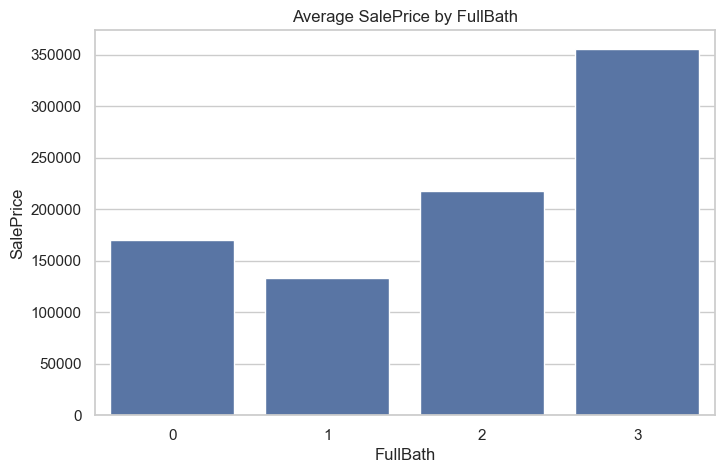

In [120]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_train_selected, x='FullBath', y='SalePrice', ci=None)
plt.title('Average SalePrice by FullBath')
plt.show()

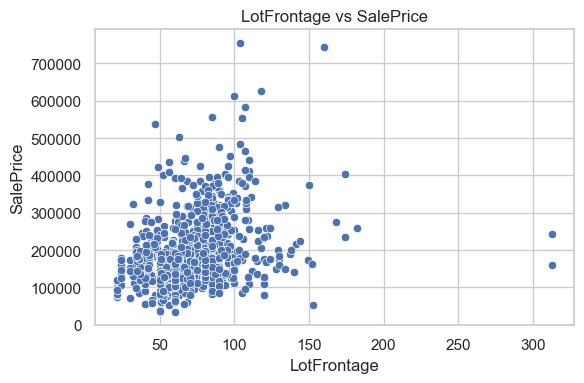

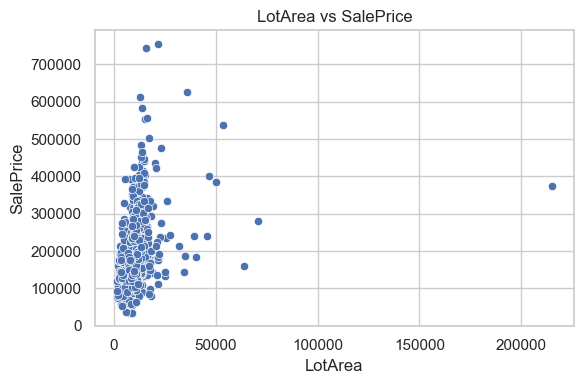

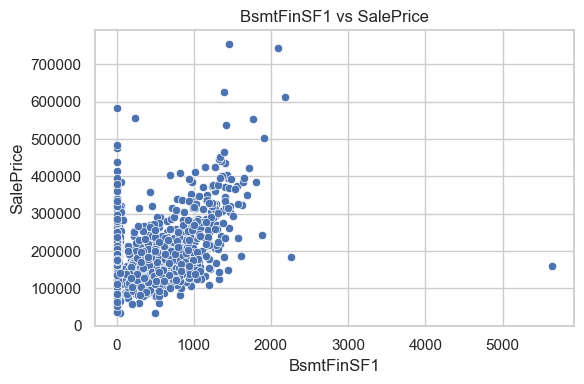

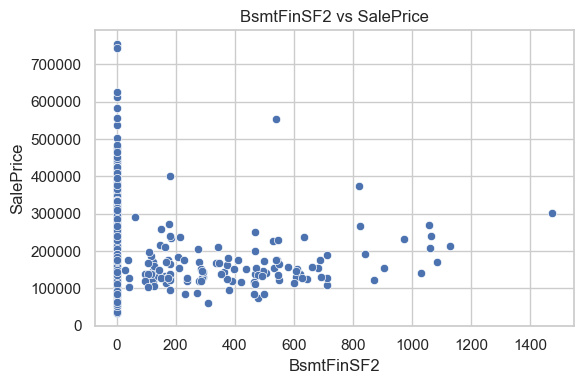

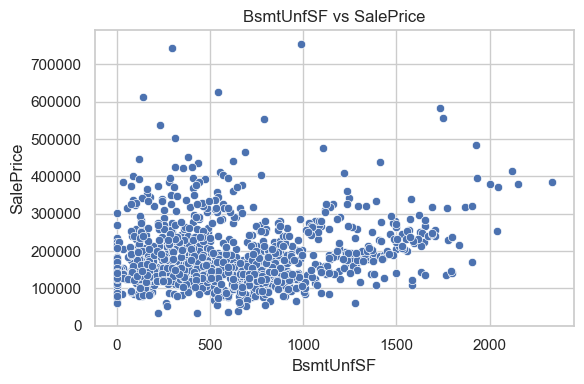

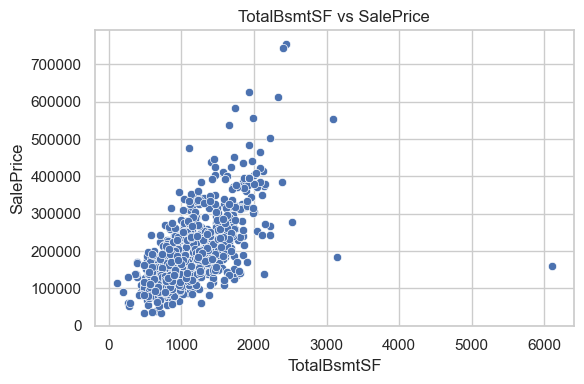

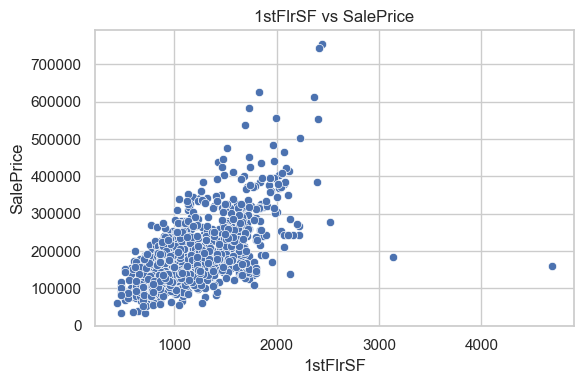

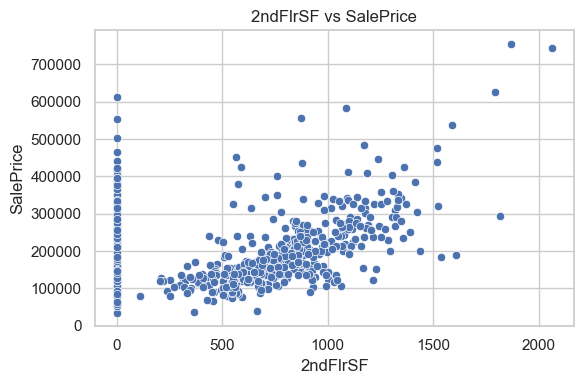

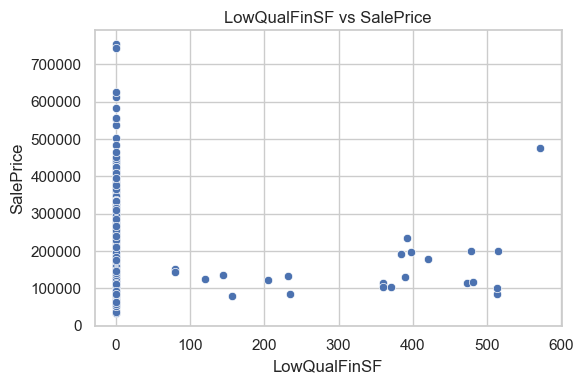

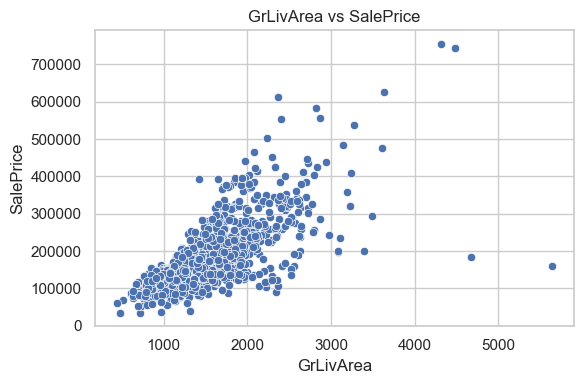

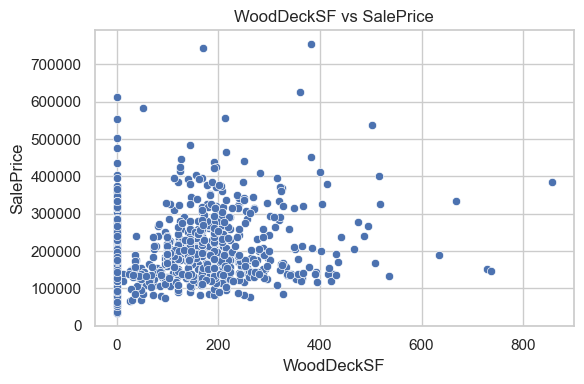

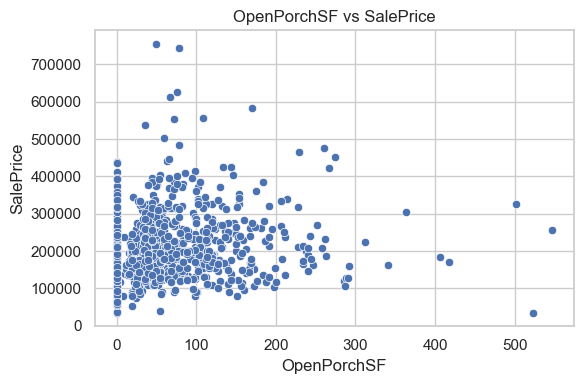

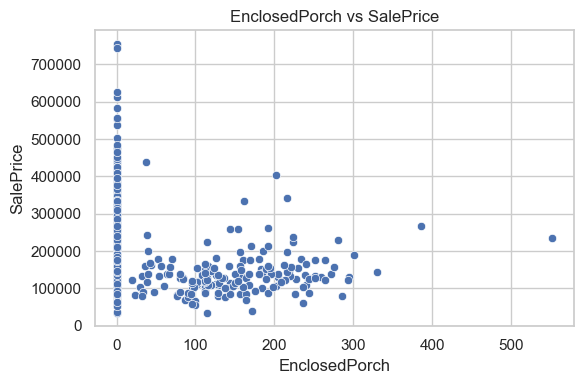

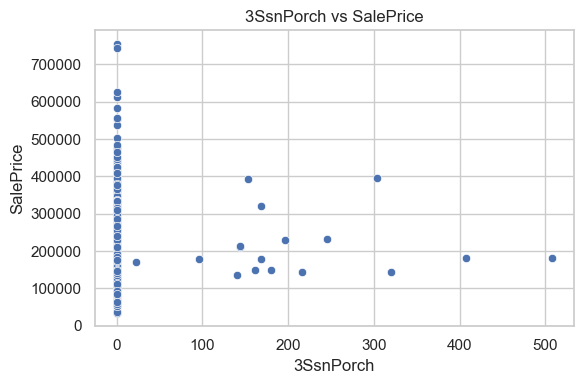

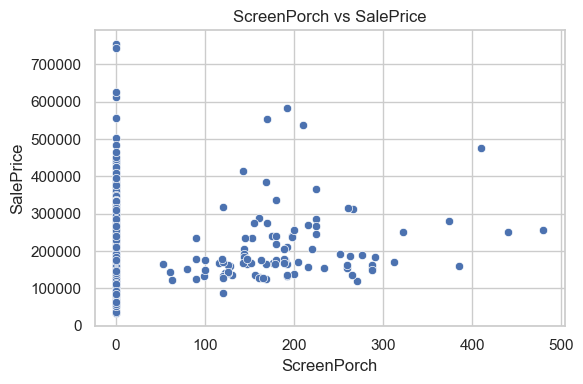

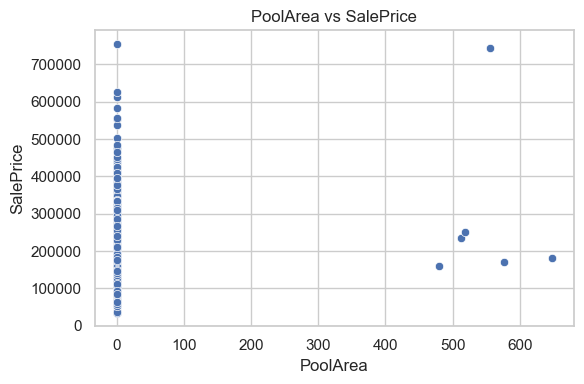

In [121]:
sns.set(style='whitegrid')
num_features = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                'ScreenPorch','PoolArea']

for feature in num_features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(data=df_train_selected, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.tight_layout()
    plt.show()

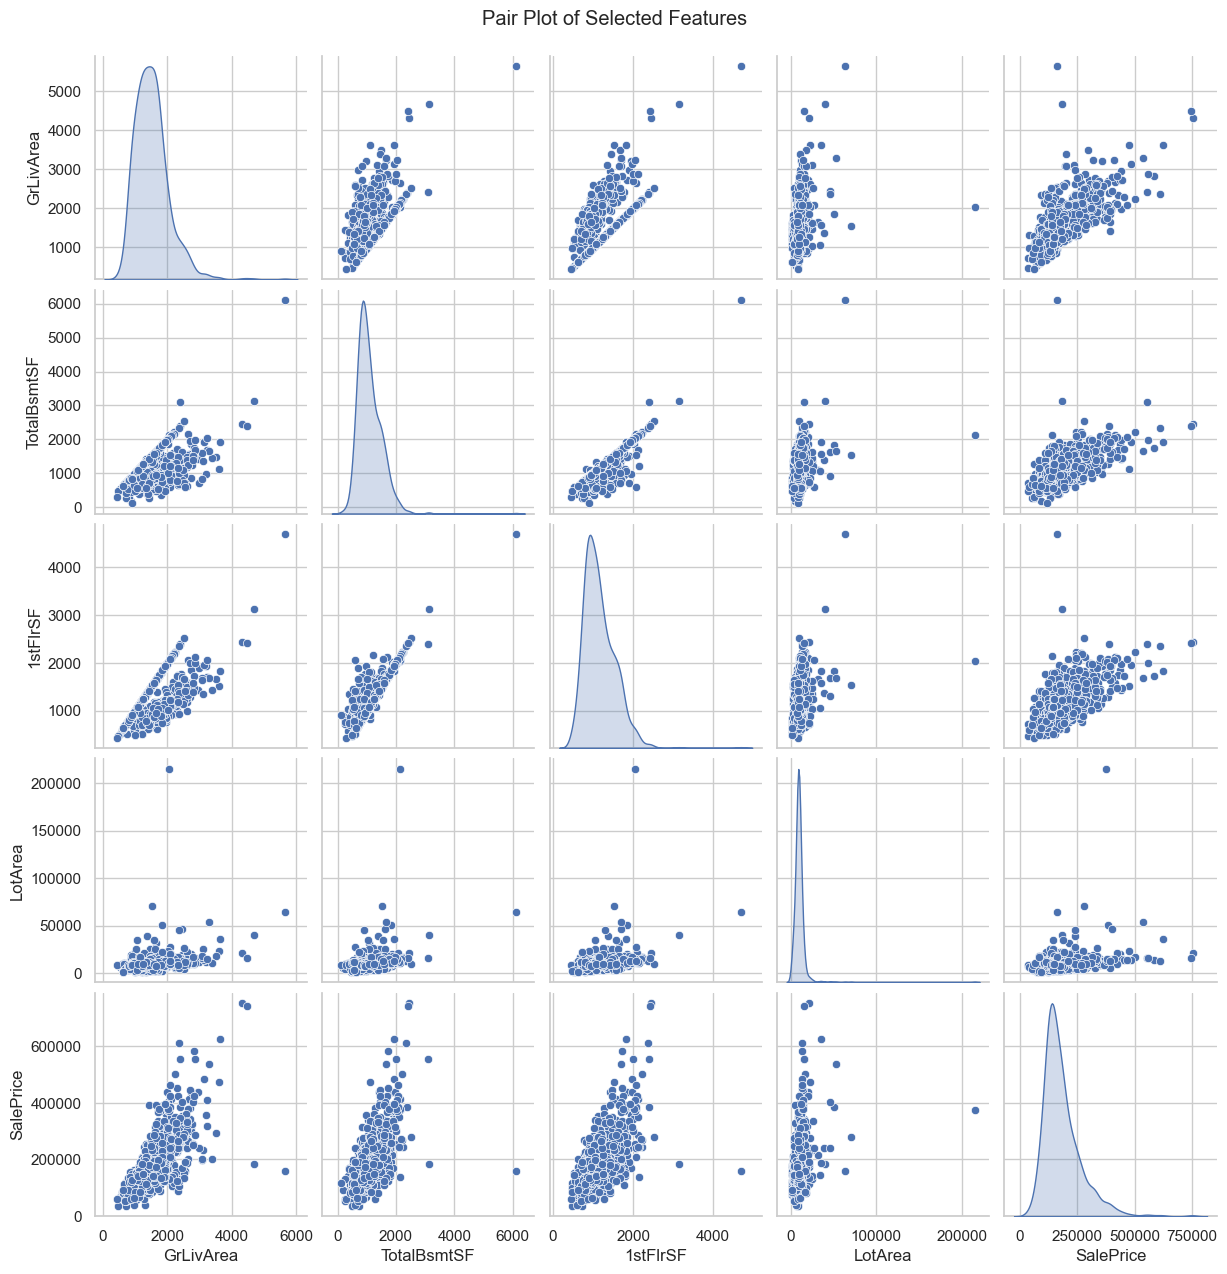

In [122]:
selected_pairs = ['GrLivArea', 'TotalBsmtSF', '1stFlrSF', 'LotArea', 'SalePrice']
sns.pairplot(df_train_selected[selected_pairs], diag_kind='kde')
plt.suptitle("Pair Plot of Selected Features", y=1.02)
plt.show()

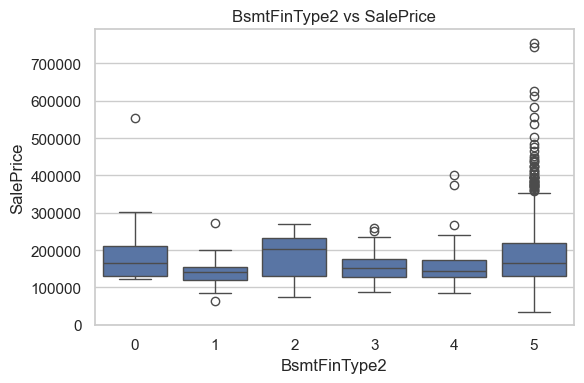

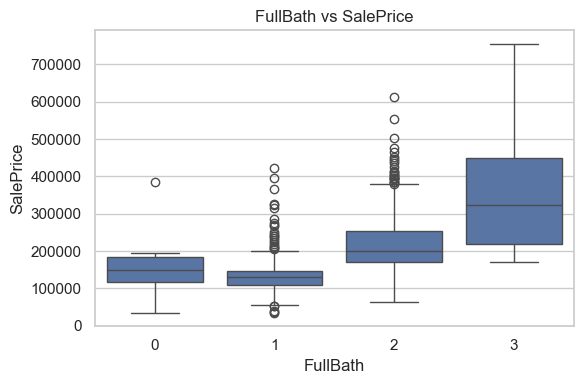

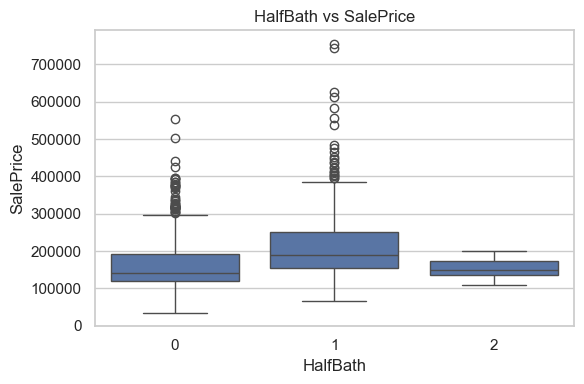

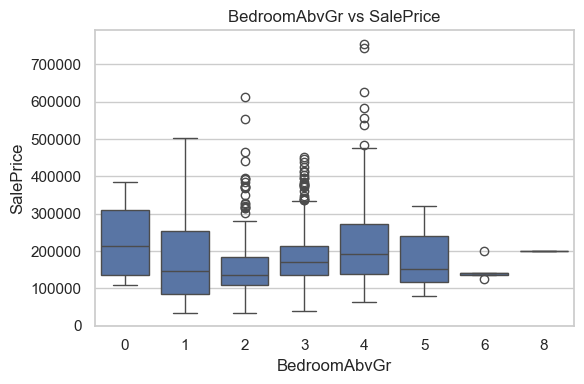

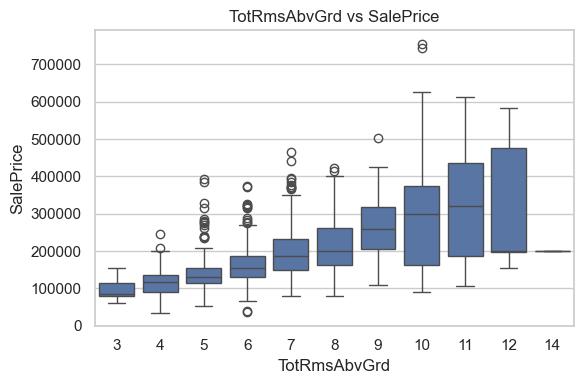

In [123]:
cat_features = ['BsmtFinType2', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd']

for feature in cat_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train_selected, x=feature, y='SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.tight_layout()
    plt.show()

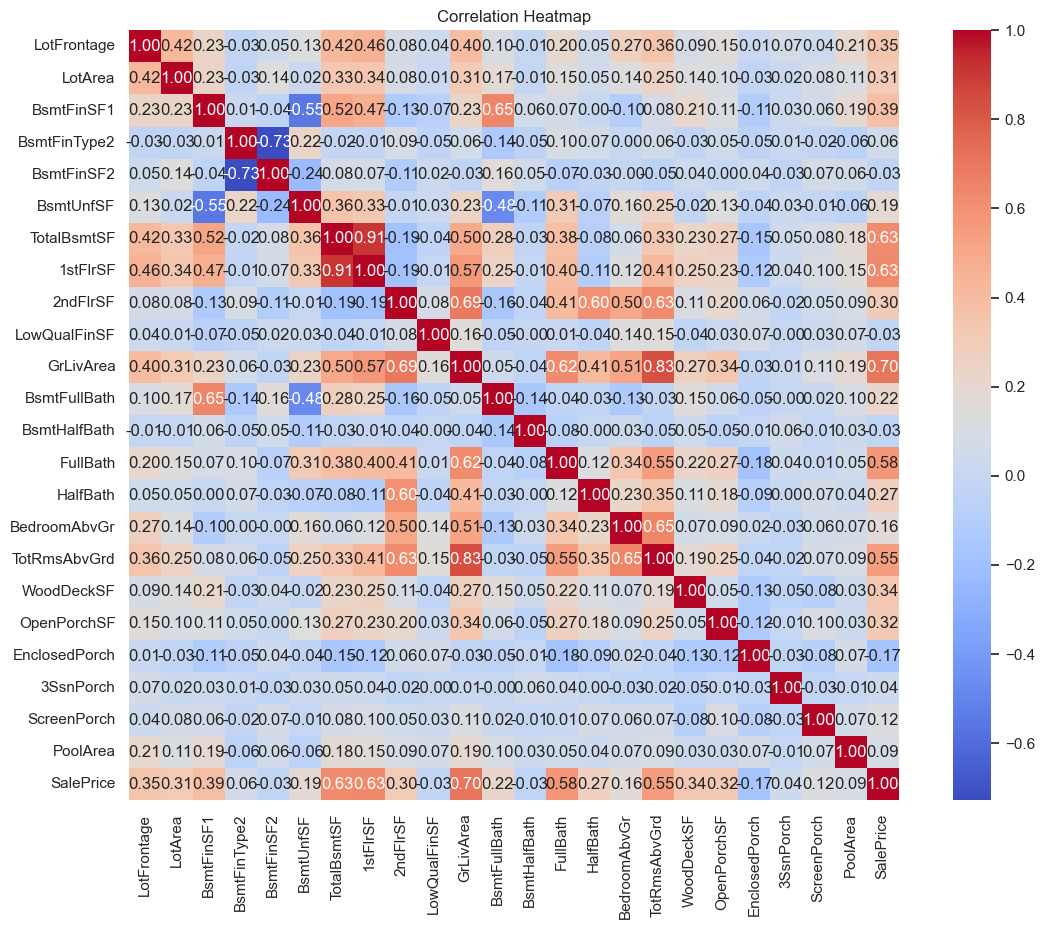

In [124]:
plt.figure(figsize=(14,10))
corr = df_train_selected.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()

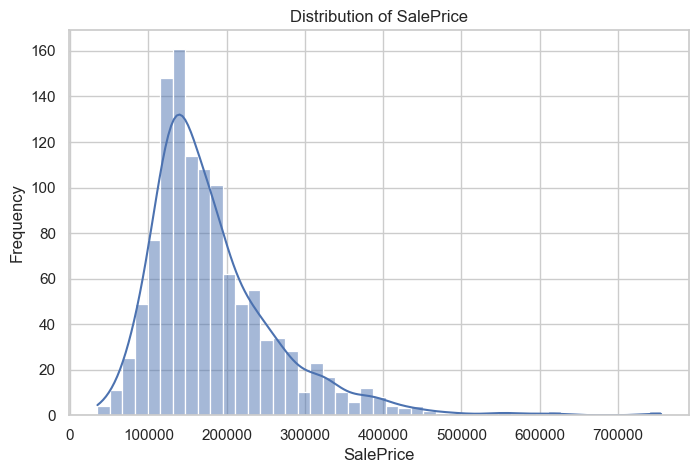

In [125]:
plt.figure(figsize=(8, 5))
sns.histplot(df_train_selected['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Outlier Removal - IQR Method

In [178]:
def remove_outliers_iqr(df, features):
    df_clean = df.copy()
    for feature in features:
        Q1 = df_clean[feature].quantile(0.25)
        Q3 = df_clean[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    return df_clean

In [180]:
features_to_check = ['LotFrontage','LotArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF',
                     'TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea',
                     'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch',
                     'ScreenPorch','PoolArea','SalePrice']

df_no_outliers = remove_outliers_iqr(df_train_selected, features_to_check)

In [182]:
print("Original shape:", df_train_selected.shape)
print("After removing outliers:", df_no_outliers.shape)

Original shape: (1169, 24)
After removing outliers: (585, 24)


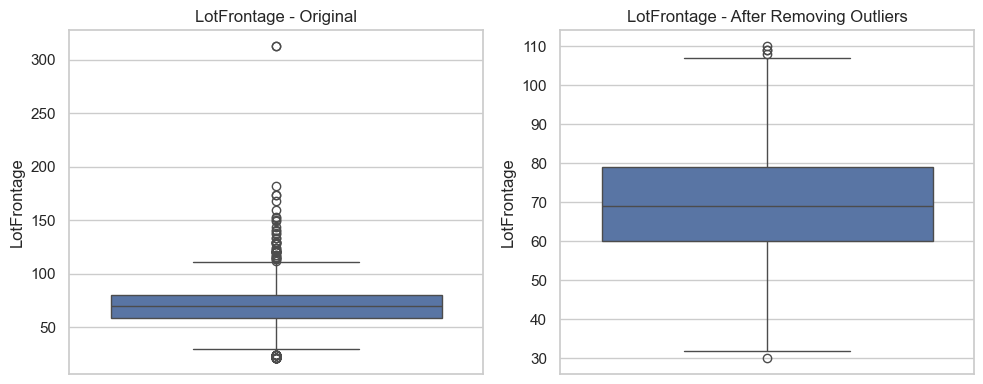

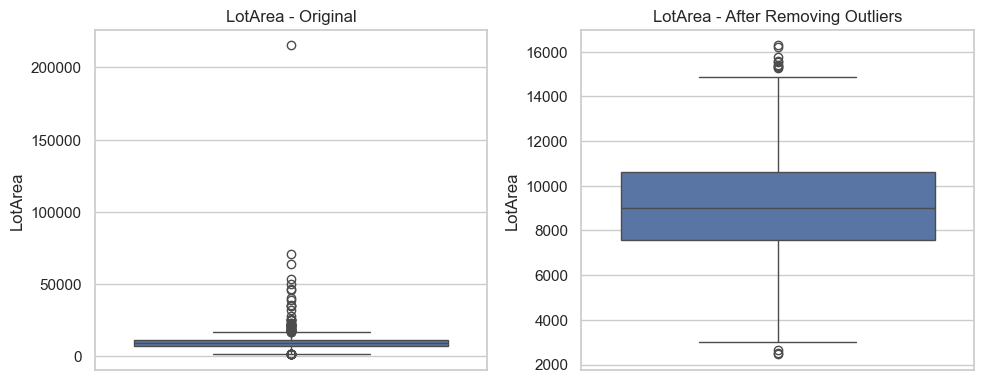

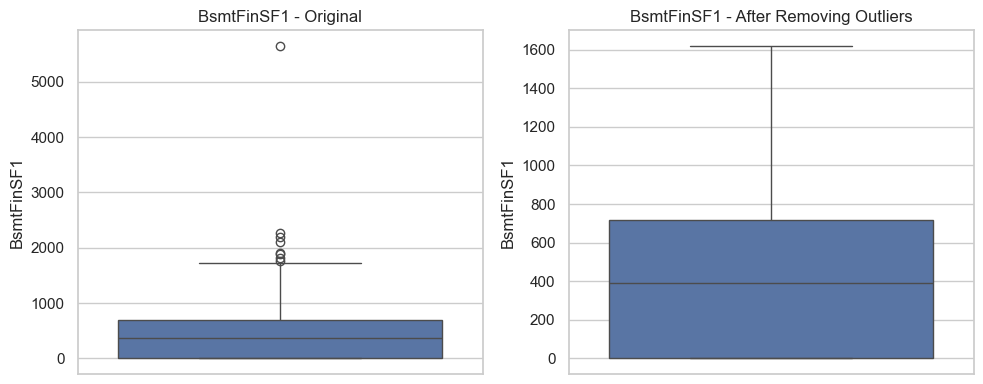

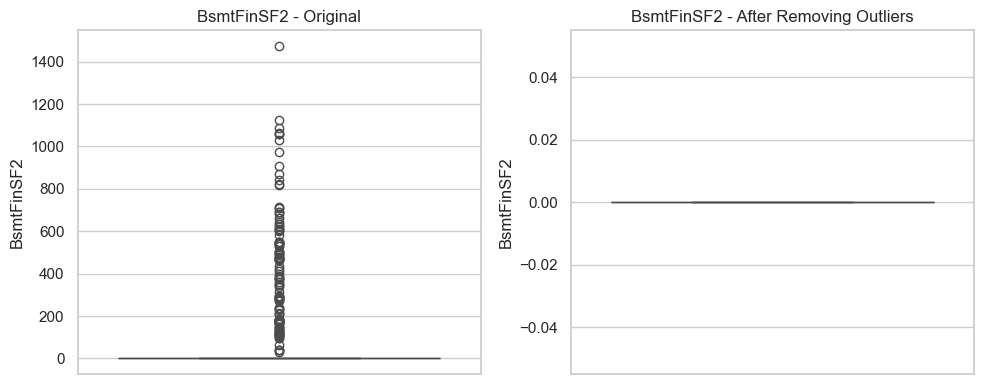

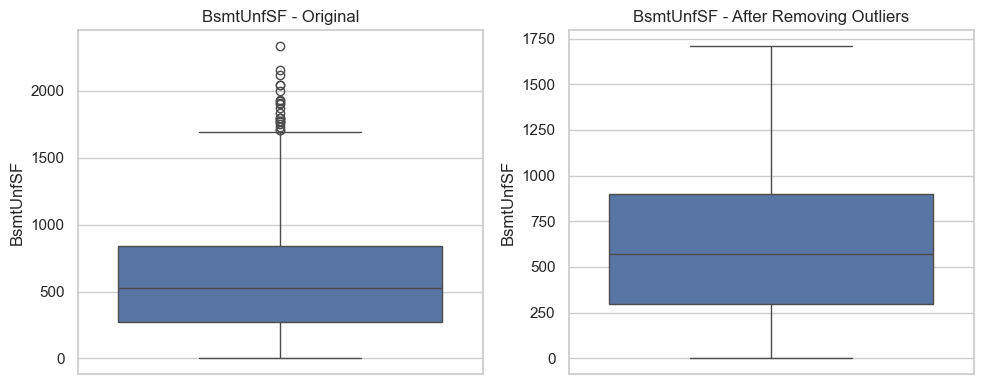

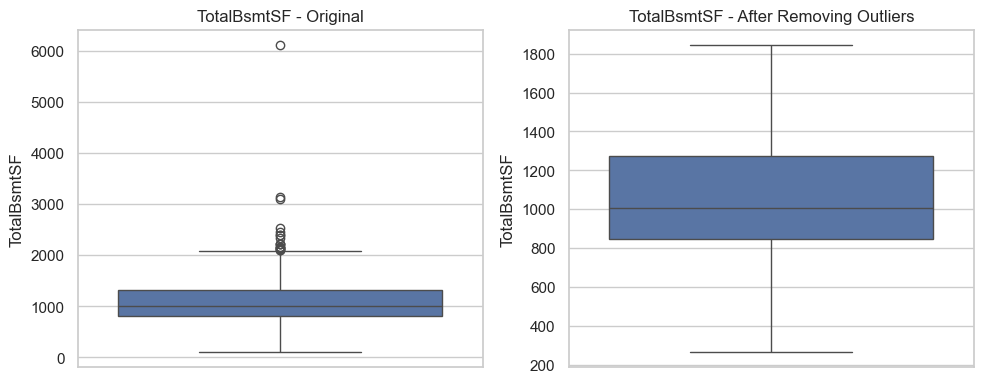

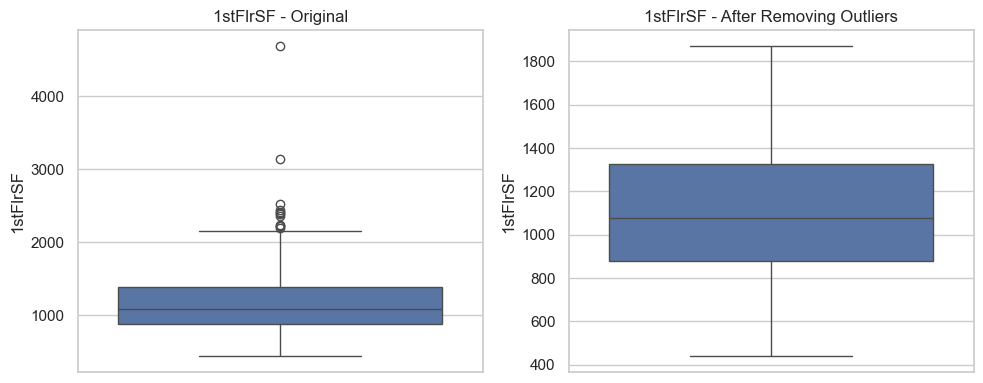

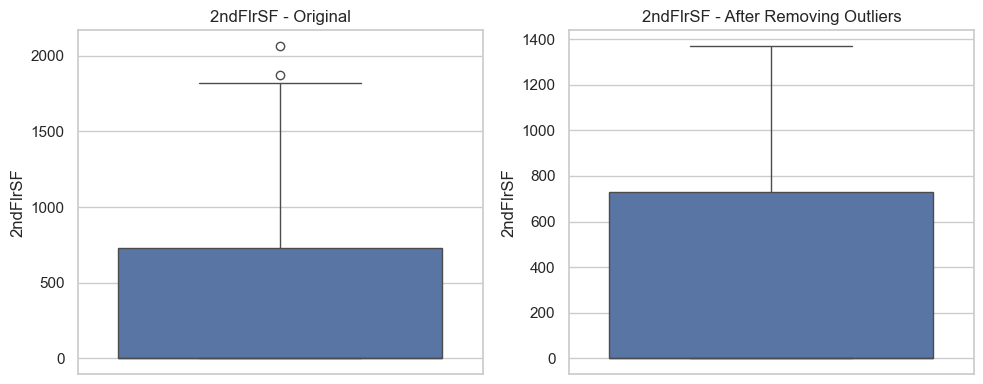

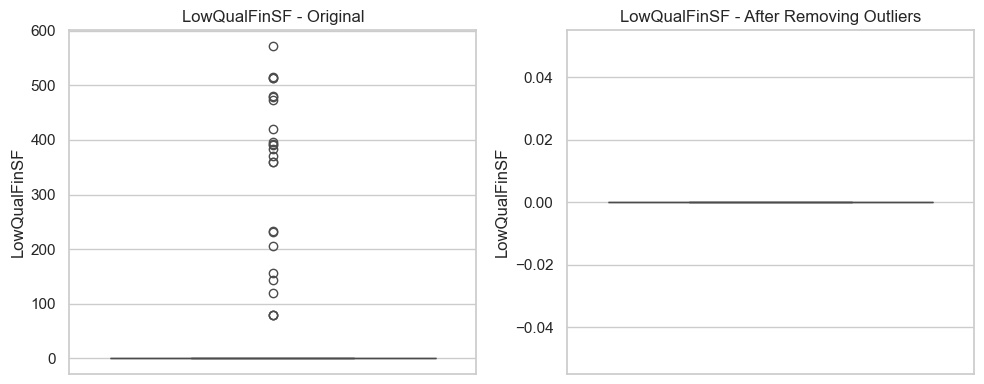

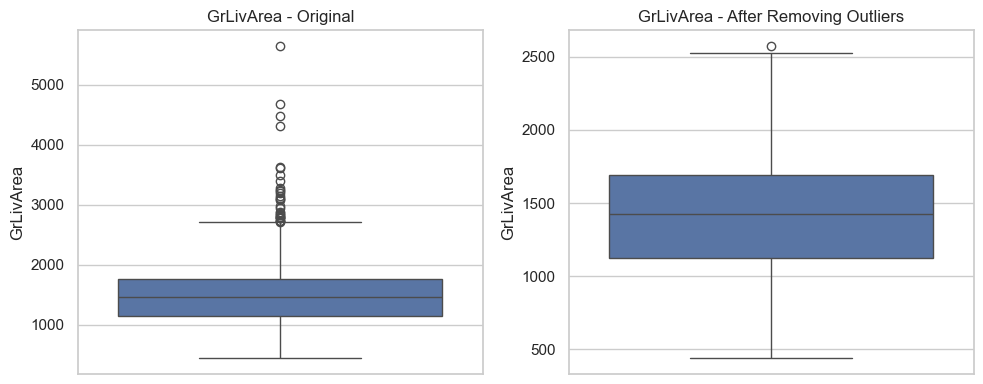

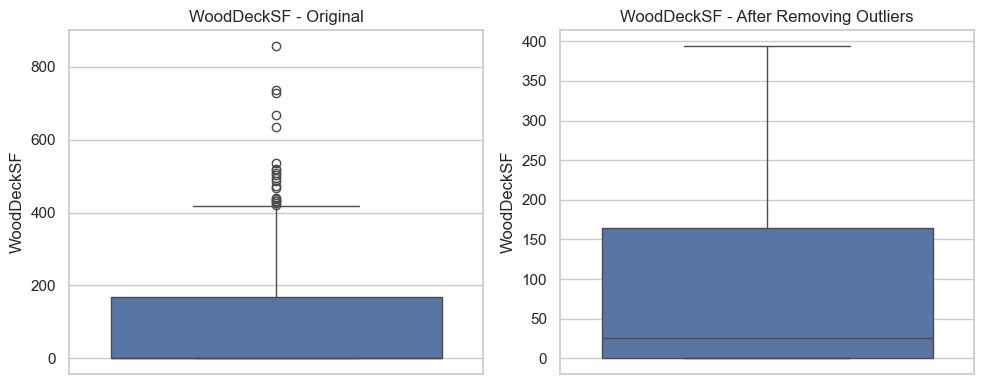

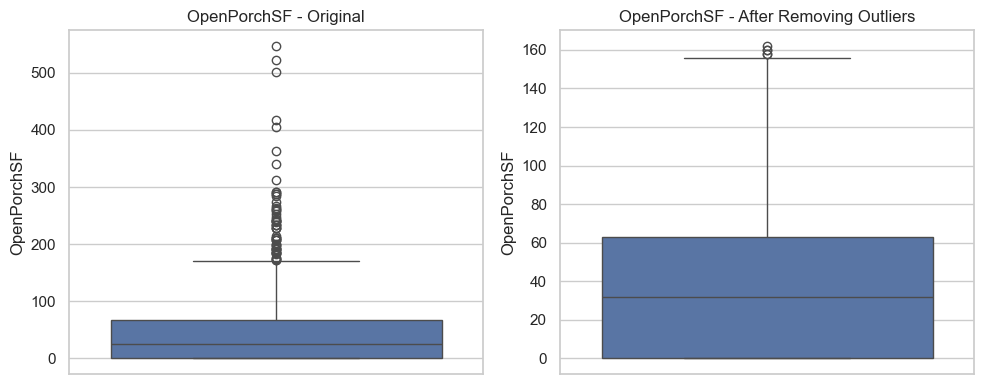

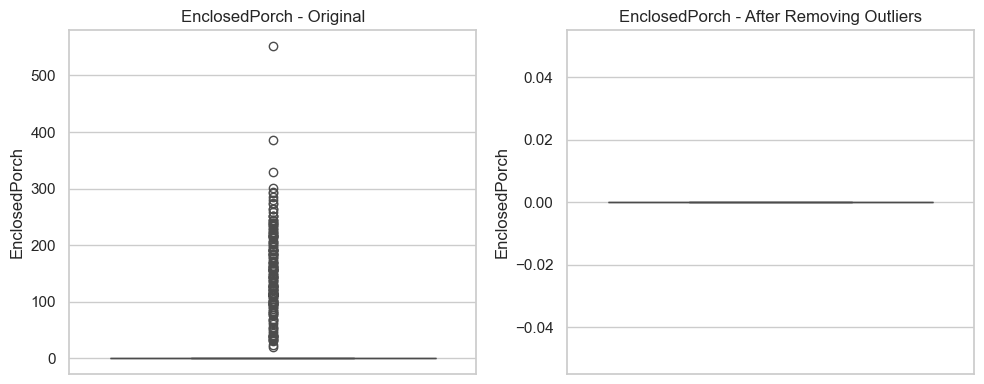

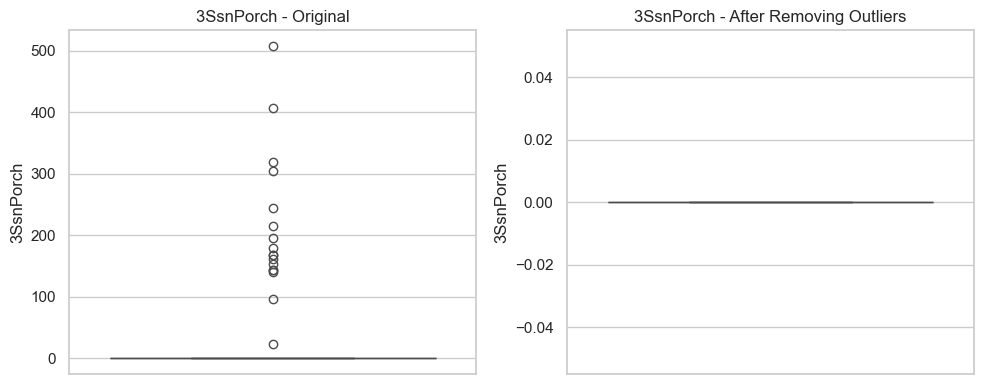

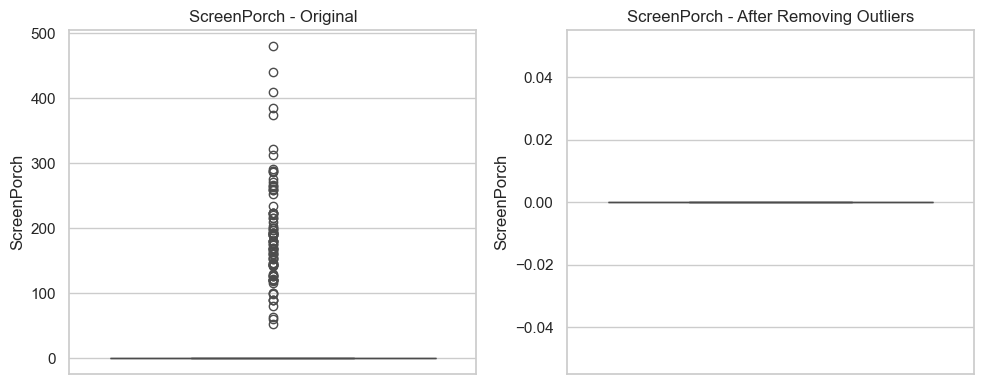

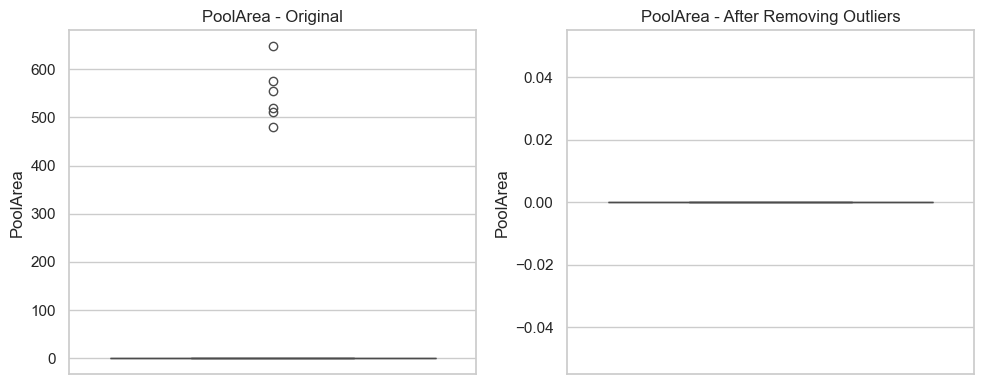

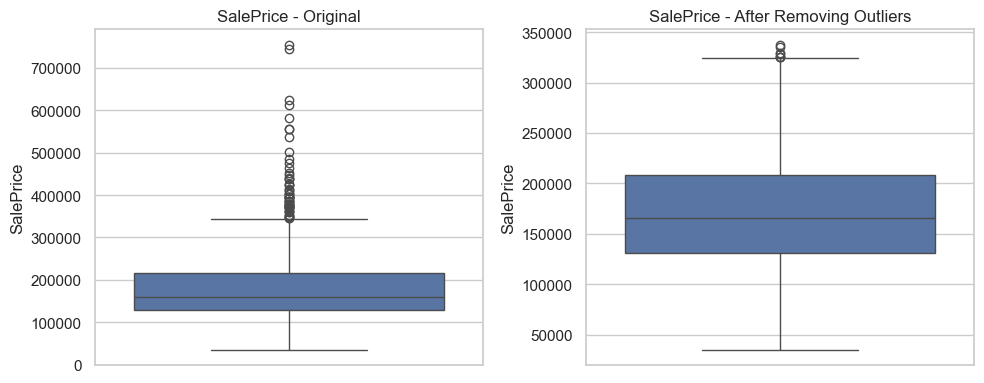

In [184]:
for feature in features_to_check:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    sns.boxplot(data=df_train_selected[feature], ax=axes[0])
    axes[0].set_title(f'{feature} - Original')
    sns.boxplot(data=df_no_outliers[feature], ax=axes[1])
    axes[1].set_title(f'{feature} - After Removing Outliers')
    plt.tight_layout()
    plt.show()

# Model Training

In [186]:
regressor_model = LinearRegression()

In [187]:
X=df_train_selected.drop(columns=['SalePrice'])
y=df_train_selected['SalePrice']

In [188]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [189]:
regressor_model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_train_prediction=regressor_model.predict(X_test)

In [191]:
mae = mean_absolute_error(y_test, y_train_prediction)
mse = mean_squared_error(y_test, y_train_prediction)
rmse = mean_squared_error(y_test, y_train_prediction, squared=False)
r2 = r2_score(y_test, y_train_prediction)

In [192]:
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R² Score:", r2)

MAE: 34152.5808384144
MSE: 3963432799.943016
RMSE: 62955.80036774225
R² Score: 0.5604972738999501


In [193]:
X_test_data=df_test_selected

In [194]:
test_df_pred=regressor_model.predict(X_test_data)

In [195]:
test_file=pd.DataFrame()
test_file['Id']=id
test_file['SalePrice']=test_df_pred
test_file= pd.DataFrame(test_file)

csv_file_path = 'submission.csv'
test_file.to_csv(csv_file_path, index=False)